In [1]:
!pip install gensim

In [3]:
import gensim
import pandas as pd
import numpy as np

In [7]:
df = pd.read_json('Sports_and_Outdoors_5.json', lines=True)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AIXZKN4ACSKI,1881509818,David Briner,"[0, 0]",This came in on time and I am veru happy with ...,5,Woks very good,1390694400,"01 26, 2014"
1,A1L5P841VIO02V,1881509818,Jason A. Kramer,"[1, 1]",I had a factory Glock tool that I was using fo...,5,Works as well as the factory tool,1328140800,"02 2, 2012"
2,AB2W04NI4OEAD,1881509818,J. Fernald,"[2, 2]",If you don't have a 3/32 punch or would like t...,4,"It's a punch, that's all.",1330387200,"02 28, 2012"
3,A148SVSWKTJKU6,1881509818,"Jusitn A. Watts ""Maverick9614""","[0, 0]",This works no better than any 3/32 punch you w...,4,It's a punch with a Glock logo.,1328400000,"02 5, 2012"
4,AAAWJ6LW9WMOO,1881509818,Material Man,"[0, 0]",I purchased this thinking maybe I need a speci...,4,"Ok,tool does what a regular punch does.",1366675200,"04 23, 2013"


In [9]:
df.shape

(296337, 9)

In [11]:
review_text = df.reviewText.apply(gensim.utils.simple_preprocess)
review_text

0         [this, came, in, on, time, and, am, veru, happ...
1         [had, factory, glock, tool, that, was, using, ...
2         [if, you, don, have, punch, or, would, like, t...
3         [this, works, no, better, than, any, punch, yo...
4         [purchased, this, thinking, maybe, need, speci...
                                ...                        
296332    [this, is, water, bottle, done, right, it, is,...
296333    [if, you, re, looking, for, an, insulated, wat...
296334    [this, hydracentials, sporty, oz, double, insu...
296335    [as, usual, received, this, item, free, in, ex...
296336    [hydracentials, insulated, oz, water, bottle, ...
Name: reviewText, Length: 296337, dtype: object

In [15]:
review_text.loc[110]

['this',
 'was',
 'one',
 'gift',
 'that',
 'will',
 'give',
 'back',
 'great',
 'tension',
 'and',
 'feels',
 'strong',
 'good',
 'work',
 'out',
 'for',
 'all',
 'going',
 'to',
 'get',
 'me',
 'one',
 'next',
 'time']

# Building word2vec model

In [22]:
model = gensim.models.Word2Vec(vector_size=100,window=5,min_count=2)

In [ ]:
#This dataset consists of reviews of fine foods from amazon. The data span a period

In [24]:
model.build_vocab(review_text, progress_per=1000)

In [26]:
model.train(review_text, total_examples=model.corpus_count, epochs=model.epochs)

(91343402, 121496535)

In [28]:
model.wv.most_similar('happy')

[('pleased', 0.9510558247566223),
 ('satisfied', 0.9359816908836365),
 ('impressed', 0.8238605856895447),
 ('unhappy', 0.8056859970092773),
 ('thrilled', 0.767521858215332),
 ('dissatisfied', 0.7318702340126038),
 ('delighted', 0.7215407490730286),
 ('satisifed', 0.6875472664833069),
 ('thankful', 0.681361734867096),
 ('disappointed', 0.6787144541740417)]

In [30]:
model.wv.most_similar('abhor')

[('widemouth', 0.5182031989097595),
 ('prefilter', 0.5128642916679382),
 ('hydrogen', 0.5060527324676514),
 ('sanitize', 0.49895405769348145),
 ('dispersed', 0.48828747868537903),
 ('squeezable', 0.4814729392528534),
 ('aquasana', 0.48126325011253357),
 ('permeated', 0.48037809133529663),
 ('neutralize', 0.4759885370731354),
 ('lifefactory', 0.47482508420944214)]

In [32]:
model.wv.similarity(w1='happy', w2='joy')

0.085031256

In [34]:
model.wv.similarity(w1='good', w2='great')

0.8007206

In [36]:
model.wv.similarity(w1='good', w2='bad')

0.54966354

In [40]:
model.wv.similarity(w1='good', w2='awful')

0.36515194

# Real Time Project  - Word2Vec with Classification model building 

## email_data (spam filtering by using word2vec)

In [44]:
import gensim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [46]:
df = pd.read_csv('email_data.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


In [48]:
df.shape

(5171, 4)

In [52]:
df['label'].value_counts(normalize=True)

label
ham     0.710114
spam    0.289886
Name: proportion, dtype: float64

## Visualizing the distribution of most frequent words

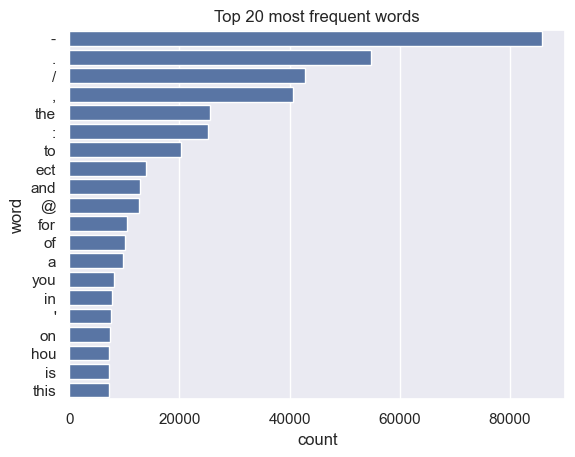

In [57]:
from collections import Counter
all_words = " ".join(df['text'].values).split()
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)
common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])
sns.barplot(data=common_words_df, x='count', y='word')
plt.title("Top 20 most frequent words")
plt.show()

In [59]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


In [61]:
x = df[['text']]
y = df['label']

In [63]:
x.head()

,text
0,Subject: enron methanol ; meter # : 988291\nth...
1,"Subject: hpl nom for january 9 , 2001\n( see a..."
2,"Subject: neon retreat\nho ho ho , we ' re arou..."
3,"Subject: photoshop , windows , office . cheap ..."
4,Subject: re : indian springs\nthis deal is to ...


In [65]:
y

0        ham
1        ham
2        ham
3       spam
4        ham
        ... 
5166     ham
5167     ham
5168     ham
5169     ham
5170    spam
Name: label, Length: 5171, dtype: object

In [67]:
# split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [69]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(4136, 1) (1035, 1)
(4136,) (1035,)


# Apply Data Preprocessing on Training Data
## Text Cleaning

In [72]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [94]:
def clean(doc):
    regex = "[^a-zA-Z]"
    doc = re.sub(regex, " ", doc)
    doc = doc.lower()
    tokens = nltk.word_tokenize(doc)
    stop_words = list(set(stopwords.words('english')))
    custom_stop_words = ['subject','hpl','ect','hou','enron','hstoett']
    stop_words = stop_words + custom_stop_words
    filtered_tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemmatizer_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    return " ".join(lemmatizer_tokens)    

In [86]:
!pip install tqdm

In [90]:
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()

In [96]:
x_train['clean_text'] = x_train['text'].progress_apply(lambda doc:clean(doc))
x_train.head()

100%|█████████████████████████████████████████████████████████████████████████████| 4136/4136 [00:04<00:00, 884.06it/s]


,text,clean_text
656,Subject: re : the hstoett lady sucklng huge cc...,lady sucklng huge ccok pleasure squire kuwo
4752,"Subject: lose 19 % , powerful weightloss now a...",lose powerful weightloss available hello speci...
4483,"Subject: 98 - 2601\nhi daren ,\ni ' m attempti...",hi daren attempting clear mentioned meter erro...
1109,Subject: 2 nd rev mar . 2000 josey ranch nom\n...,nd rev mar josey ranch nom forwarded susan tre...
711,Subject: lose it\nos effetiveeight os aaiabe w...,lose o effetiveeight o aaiabe withoutrescripti...


# Distributed Language model 

### Generating Word2Vec representation

# step 1 : convert the sentences to the list of words(token)
# step 2 : import word2vec module from gensim.models
# step 3 : user word2vec to learn numeric vectors for each unique words, word2vec uses the list of tokens ang generate 300-dim numerical vecotr for each unique word
# step 4 : convert the word vector to document vectors

In [101]:
x_train.head()

,text,clean_text
656,Subject: re : the hstoett lady sucklng huge cc...,lady sucklng huge ccok pleasure squire kuwo
4752,"Subject: lose 19 % , powerful weightloss now a...",lose powerful weightloss available hello speci...
4483,"Subject: 98 - 2601\nhi daren ,\ni ' m attempti...",hi daren attempting clear mentioned meter erro...
1109,Subject: 2 nd rev mar . 2000 josey ranch nom\n...,nd rev mar josey ranch nom forwarded susan tre...
711,Subject: lose it\nos effetiveeight os aaiabe w...,lose o effetiveeight o aaiabe withoutrescripti...


In [103]:
# converting the sentence to the list of words (i.e. list of tokens)
x_train['tokenised_sentence'] = x_train['clean_text'].apply(lambda doc: doc.split())
x_train

,text,clean_text,tokenised_sentence
656,Subject: re : the hstoett lady sucklng huge cc...,lady sucklng huge ccok pleasure squire kuwo,"[lady, sucklng, huge, ccok, pleasure, squire, ..."
4752,"Subject: lose 19 % , powerful weightloss now a...",lose powerful weightloss available hello speci...,"[lose, powerful, weightloss, available, hello,..."
4483,"Subject: 98 - 2601\nhi daren ,\ni ' m attempti...",hi daren attempting clear mentioned meter erro...,"[hi, daren, attempting, clear, mentioned, mete..."
1109,Subject: 2 nd rev mar . 2000 josey ranch nom\n...,nd rev mar josey ranch nom forwarded susan tre...,"[nd, rev, mar, josey, ranch, nom, forwarded, s..."
711,Subject: lose it\nos effetiveeight os aaiabe w...,lose o effetiveeight o aaiabe withoutrescripti...,"[lose, o, effetiveeight, o, aaiabe, withoutres..."
...,...,...,...
2622,Subject: confirming requisitions\nconfirming t...,confirming requisition confirming open requist...,"[confirming, requisition, confirming, open, re..."
977,Subject: check the superb specials on top - se...,check superb special top selling r xdrugs dema...,"[check, superb, special, top, selling, r, xdru..."
3111,Subject: union carbide - seadrift hpl meter # ...,union carbide seadrift meter union carbide mon...,"[union, carbide, seadrift, meter, union, carbi..."
4569,Subject: re : personal information needs to be...,personal information need updated fixed sap ab...,"[personal, information, need, updated, fixed, ..."


In [107]:
from gensim.models import Word2Vec
%time word2vec_vect = Word2Vec(x_train['tokenised_sentence'], vector_size=300, min_count=1)
print(word2vec_vect)

CPU times: total: 6.23 s
Wall time: 5.59 s
Word2Vec<vocab=37311, vector_size=300, alpha=0.025>


In [111]:
print(word2vec_vect.corpus_count)
print(len(word2vec_vect.wv.index_to_key))
print(word2vec_vect.vector_size)

4136
37311
300


In [113]:
def get_document_vector(doc, model):
    tokens = [word for word in doc if word in model]
    if tokens:
        doc_embedding = np.mean(model[tokens], axis=0)
    else:
        doc_embedding = np.zeros(model.vector_size)
    return doc_embedding

In [115]:
x_train['w2v_doc_embeddings'] = x_train['tokenised_sentence'].apply(lambda doc: get_document_vector(doc, word2vec_vect.wv))
x_train

,text,clean_text,tokenised_sentence,w2v_doc_embeddings
656,Subject: re : the hstoett lady sucklng huge cc...,lady sucklng huge ccok pleasure squire kuwo,"[lady, sucklng, huge, ccok, pleasure, squire, ...","[0.010615199, 0.04589564, 0.03158642, 0.059578..."
4752,"Subject: lose 19 % , powerful weightloss now a...",lose powerful weightloss available hello speci...,"[lose, powerful, weightloss, available, hello,...","[-0.0011932447, 0.16986312, 0.21794286, 0.1794..."
4483,"Subject: 98 - 2601\nhi daren ,\ni ' m attempti...",hi daren attempting clear mentioned meter erro...,"[hi, daren, attempting, clear, mentioned, mete...","[-0.26932907, 0.5209221, 0.16120219, 0.0632590..."
1109,Subject: 2 nd rev mar . 2000 josey ranch nom\n...,nd rev mar josey ranch nom forwarded susan tre...,"[nd, rev, mar, josey, ranch, nom, forwarded, s...","[-0.030505093, 0.42669746, -0.051313758, 0.242..."
711,Subject: lose it\nos effetiveeight os aaiabe w...,lose o effetiveeight o aaiabe withoutrescripti...,"[lose, o, effetiveeight, o, aaiabe, withoutres...","[0.0146421585, 0.061673187, 0.055329062, 0.057..."
...,...,...,...,...
2622,Subject: confirming requisitions\nconfirming t...,confirming requisition confirming open requist...,"[confirming, requisition, confirming, open, re...","[-0.04189122, 0.45479092, -0.033870474, 0.1045..."
977,Subject: check the superb specials on top - se...,check superb special top selling r xdrugs dema...,"[check, superb, special, top, selling, r, xdru...","[0.022800514, 0.14830236, 0.16411698, 0.157414..."
3111,Subject: union carbide - seadrift hpl meter # ...,union carbide seadrift meter union carbide mon...,"[union, carbide, seadrift, meter, union, carbi...","[-0.3404083, 0.4945461, 0.08927006, 0.13512236..."
4569,Subject: re : personal information needs to be...,personal information need updated fixed sap ab...,"[personal, information, need, updated, fixed, ...","[-0.055718172, 0.4655886, 0.08539588, 0.178423..."


In [122]:
x_test['clean_text'] = x_test['text'].progress_apply(lambda doc:clean(doc))
x_test.head()

100%|█████████████████████████████████████████████████████████████████████████████| 1035/1035 [00:03<00:00, 265.29it/s]


,text,clean_text
774,Subject: final cp name change and merger repor...,final cp name change merger report clarify feb...
2630,Subject: calpine daily gas nomination\n- hidal...,calpine daily gas nomination hidalgo daily gas...
2543,Subject: calpine daily gas nomination\n>\naime...,calpine daily gas nomination aimee office frid...
3291,"Subject: wells\ndaren , i think i may have los...",well daren think may lost mind comment vance t...
5024,Subject: first deliveries - comstock oil & gas...,first delivery comstock oil gas hesco gatherin...


In [124]:
x_test['tokenised_sentence'] = x_test['clean_text'].apply(lambda doc: doc.split())
x_test

,text,clean_text,tokenised_sentence
774,Subject: final cp name change and merger repor...,final cp name change merger report clarify feb...,"[final, cp, name, change, merger, report, clar..."
2630,Subject: calpine daily gas nomination\n- hidal...,calpine daily gas nomination hidalgo daily gas...,"[calpine, daily, gas, nomination, hidalgo, dai..."
2543,Subject: calpine daily gas nomination\n>\naime...,calpine daily gas nomination aimee office frid...,"[calpine, daily, gas, nomination, aimee, offic..."
3291,"Subject: wells\ndaren , i think i may have los...",well daren think may lost mind comment vance t...,"[well, daren, think, may, lost, mind, comment,..."
5024,Subject: first deliveries - comstock oil & gas...,first delivery comstock oil gas hesco gatherin...,"[first, delivery, comstock, oil, gas, hesco, g..."
...,...,...,...
1903,Subject: hpl fuel gas buy - back for december ...,fuel gas buy back december fyi forwarded gregg...,"[fuel, gas, buy, back, december, fyi, forwarde..."
1376,"Subject: re : exxon company , usa global # 960...",exxon company usa global sitara checked sitara...,"[exxon, company, usa, global, sitara, checked,..."
1905,Subject: i ' m glad we met\ntotally awesome\nc...,glad met totally awesome city city guide chic ...,"[glad, met, totally, awesome, city, city, guid..."
1846,"Subject: hpl nom for july 14 , 2000\n( see att...",nom july see attached file hplo xl hplo xl,"[nom, july, see, attached, file, hplo, xl, hpl..."


In [126]:
x_test['w2v_doc_embeddings'] = x_test['tokenised_sentence'].apply(lambda doc: get_document_vector(doc, word2vec_vect.wv))
x_test

,text,clean_text,tokenised_sentence,w2v_doc_embeddings
774,Subject: final cp name change and merger repor...,final cp name change merger report clarify feb...,"[final, cp, name, change, merger, report, clar...","[-0.08665575, 0.52165186, 0.18558402, 0.139550..."
2630,Subject: calpine daily gas nomination\n- hidal...,calpine daily gas nomination hidalgo daily gas...,"[calpine, daily, gas, nomination, hidalgo, dai...","[-0.28072488, 0.5740003, 0.03234285, 0.5218826..."
2543,Subject: calpine daily gas nomination\n>\naime...,calpine daily gas nomination aimee office frid...,"[calpine, daily, gas, nomination, aimee, offic...","[-0.13049003, 0.45954198, 0.053482197, 0.33524..."
3291,"Subject: wells\ndaren , i think i may have los...",well daren think may lost mind comment vance t...,"[well, daren, think, may, lost, mind, comment,...","[-0.25144213, 0.58633727, 0.15334485, 0.064126..."
5024,Subject: first deliveries - comstock oil & gas...,first delivery comstock oil gas hesco gatherin...,"[first, delivery, comstock, oil, gas, hesco, g...","[-0.23374222, 0.5966766, 0.08522608, 0.2546835..."
...,...,...,...,...
1903,Subject: hpl fuel gas buy - back for december ...,fuel gas buy back december fyi forwarded gregg...,"[fuel, gas, buy, back, december, fyi, forwarde...","[-0.08497554, 0.5114837, -0.058236115, 0.22069..."
1376,"Subject: re : exxon company , usa global # 960...",exxon company usa global sitara checked sitara...,"[exxon, company, usa, global, sitara, checked,...","[-0.21949297, 0.44147834, 0.18467782, 0.132655..."
1905,Subject: i ' m glad we met\ntotally awesome\nc...,glad met totally awesome city city guide chic ...,"[glad, met, totally, awesome, city, city, guid...","[0.0032559938, 0.18441974, 0.16901827, 0.14006..."
1846,"Subject: hpl nom for july 14 , 2000\n( see att...",nom july see attached file hplo xl hplo xl,"[nom, july, see, attached, file, hplo, xl, hpl...","[-0.18354209, 1.1940801, -0.002212104, 0.34732..."


# Building Machine Learning Model

In [132]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [128]:
# building the model
classifier = LogisticRegression()
%time classifier.fit(list(x_train['w2v_doc_embeddings']), y_train)

# predicting on unseen data
y_test_pred = classifier.predict(list(x_test['w2v_doc_embeddings']))

# Model evaluation
print()
print(f"Model's Accuracy : {metrics.accuracy_score(y_test, y_test_pred)}")

CPU times: total: 78.1 ms
Wall time: 151 ms

Model's Accuracy : 0.936231884057971


In [134]:
# building the model
rfclassifier = RandomForestClassifier()
%time rfclassifier.fit(list(x_train['w2v_doc_embeddings']), y_train)

# predicting on unseen data
y_test_pred = rfclassifier.predict(list(x_test['w2v_doc_embeddings']))

# Model evaluation
print()
print(f"Model's Accuracy : {metrics.accuracy_score(y_test, y_test_pred)}")

CPU times: total: 4.78 s
Wall time: 10.6 s

Model's Accuracy : 0.9526570048309179


# Game of Throne

In [137]:
import os
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

story = []

for filename in os.listdir('gameofthrone'):
    f = open(os.path.join('gameofthrone', filename))
    corpus = f.read()
    raw_sent = sent_tokenize(corpus)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))

In [139]:
story

[['game',
  'of',
  'thrones',
  'book',
  'one',
  'of',
  'song',
  'of',
  'ice',
  'and',
  'fire',
  'by',
  'george',
  'martin',
  'prologue',
  'we',
  'should',
  'start',
  'back',
  'gared',
  'urged',
  'as',
  'the',
  'woods',
  'began',
  'to',
  'grow',
  'dark',
  'around',
  'them'],
 ['the', 'wildlings', 'are', 'dead'],
 ['do', 'the', 'dead', 'frighten', 'you'],
 ['ser',
  'waymar',
  'royce',
  'asked',
  'with',
  'just',
  'the',
  'hint',
  'of',
  'smile'],
 ['gared', 'did', 'not', 'rise', 'to', 'the', 'bait'],
 ['he',
  'was',
  'an',
  'old',
  'man',
  'past',
  'fifty',
  'and',
  'he',
  'had',
  'seen',
  'the',
  'lordlings',
  'come',
  'and',
  'go'],
 ['dead', 'is', 'dead', 'he', 'said'],
 ['we', 'have', 'no', 'business', 'with', 'the', 'dead'],
 ['are', 'they', 'dead'],
 ['royce', 'asked', 'softly'],
 ['what', 'proof', 'have', 'we'],
 ['will', 'saw', 'them', 'gared', 'said'],
 ['if',
  'he',
  'says',
  'they',
  'are',
  'dead',
  'that',
  'proof',


In [141]:
# Word2vec
model = gensim.models.Word2Vec(min_count=2)
model.build_vocab(story)
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

(6570737, 8628190)

In [145]:
model.wv.most_similar('daenerys')

[('myrcella', 0.7598474621772766),
 ('viserys', 0.7520715594291687),
 ('stormborn', 0.7319967150688171),
 ('margaery', 0.7120559215545654),
 ('targaryen', 0.7060866355895996),
 ('rhaegar', 0.7039477229118347),
 ('joffrey', 0.7016776204109192),
 ('arianne', 0.6994202136993408),
 ('cersei', 0.6919459104537964),
 ('quentyn', 0.6784349083900452)]

In [147]:
model.wv.doesnt_match(['jon','sansa','bran','robb'])

'jon'

In [153]:
model.wv.doesnt_match(['tyrion','cersei','jaime','tyrell','lannister'])

'lannister'

In [155]:
model.wv['king']

array([ 9.0774393e-01,  1.0713940e+00,  5.5052507e-01,  8.1354624e-01,
       -2.3135071e-01, -8.9766830e-01, -1.5169328e-01,  1.9540960e+00,
       -9.5257652e-01, -3.1192979e-01, -5.6121010e-01, -1.2595844e+00,
        1.0172807e+00,  6.5899342e-01, -1.4550861e+00, -1.7445992e+00,
        4.8137835e-01,  1.9469192e+00,  1.3523817e+00,  4.1640076e-01,
        1.2463740e+00, -1.5962746e+00,  1.8425913e+00, -2.2189076e+00,
       -1.9090242e+00,  2.0061753e+00, -1.5525243e+00, -2.2394743e+00,
        4.1788974e-01,  4.9171478e-01, -2.1846271e+00,  8.3395910e-01,
        2.3115312e-01, -3.3989152e-01,  1.7189448e+00, -2.6924548e+00,
       -1.0170888e+00, -7.9856944e-01,  7.7761650e-01, -2.3542426e+00,
        9.4690335e-01,  1.7654957e+00,  3.6622360e+00, -1.1044619e+00,
       -1.0133091e+00, -2.9859214e+00, -1.3080587e+00, -1.5069455e+00,
        1.8800135e+00, -3.1337056e+00, -1.1949095e+00, -6.3309991e-01,
       -9.6369678e-01, -3.2319400e+00,  3.0659108e+00, -1.0527834e+00,
      

# Amazon Review Dataset

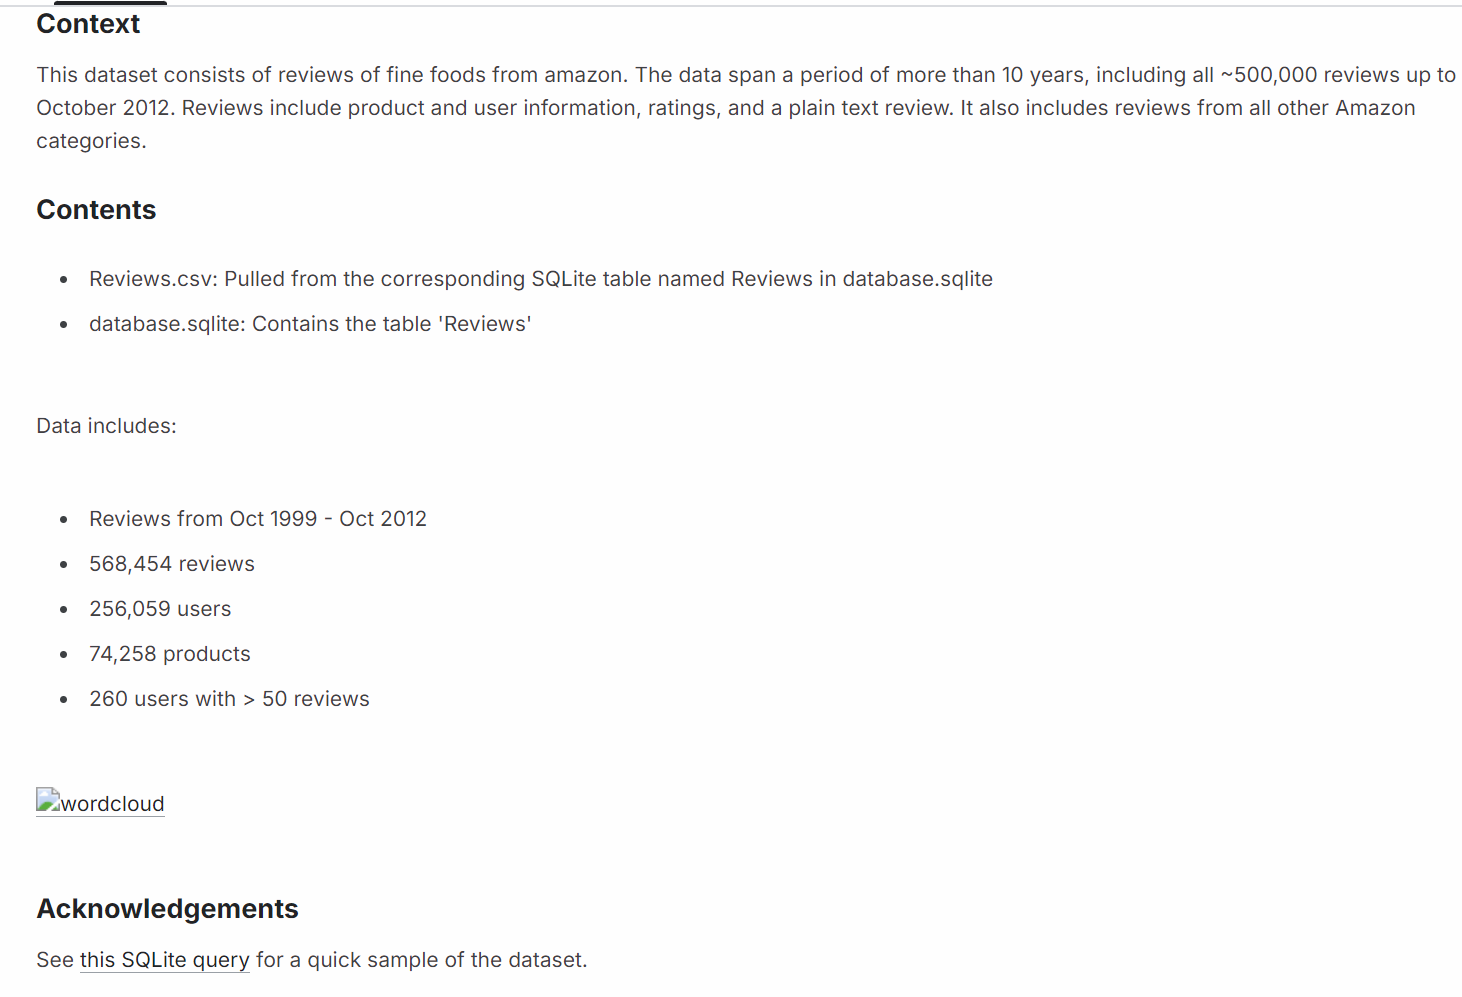

In [159]:
import sqlite3

In [167]:
con = sqlite3.connect('database.sqlite')
con

In [185]:
filtered_data = pd.read_sql_query(""" select * from Reviews where Score !=3 limit 5000 """, con)

def partition(x):
    if x<3:
        return 0
    return 1

actualScore = filtered_data['Score']
positivenegative = actualScore.map(partition)
filtered_data['Score'] = positivenegative
print(filtered_data.shape)

(5000, 10)


In [183]:
filtered_data.shape

(5000, 10)

In [173]:
filtered_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [175]:
filtered_data['Score'].value_counts()

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

In [187]:
filtered_data['Score'].value_counts()

Score
1    4187
0     813
Name: count, dtype: int64

In [189]:
filtered_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [201]:
x = filtered_data[['Text']]
y = filtered_data['Score']

In [203]:
x

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...
...,...
4995,"My baby didn't seem into these dinners, so I t..."
4996,This is great! Organic baby food options - de...
4997,My little guy loves to try new foods..so this ...
4998,We ordered the Earth's best 2nd dinner variety...


In [195]:
y

0       1
1       0
2       1
3       0
4       1
       ..
4995    0
4996    1
4997    1
4998    0
4999    0
Name: Score, Length: 5000, dtype: int64